In [1]:
import import_ipynb
from Simulations import *

importing Jupyter notebook from Simulations.ipynb


Lets start with one lending pool. The rate is 10%, the principal is 1(doesnt matter). The maturity date is 1 May 2026, and the payment period is 60 days. We assume equal amortization. Will simulate this.

In [2]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.1, 
                        "amortization" : "Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

simulation_engine = SimulationEngine(pool_array, np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date, 20000)


We calculate the default probabilties of the first pool, which should come close to 10% (not exactly), but with more paths it should converge to 10%. Then we look at the capital loss distribution for an investment of 100 dollars. The total return we should get is 100 + interest payments, so if in the future the capital loss is more than 1, that is because 100+ interest payments is more than 100, and the payments you didnt get are more than 100.

Default probability of pool A is  0.09935
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 0.0
75 percentile capital loss is 0.0
99 percentile capital loss is 128.2638788752702
Mean capital loss is  11.530579091564512


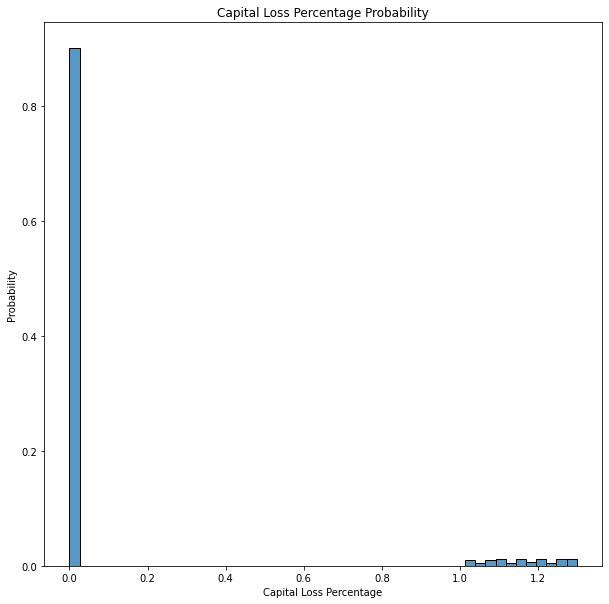

In [3]:
analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
analysis_engine.visualize_capital_losses([100])


We find that that 10th, 25th, 50th percentile capital loss is 0 and the 99 percentile capital loss is 126 (which corresponds to the case when it defaults at the start). However on most cases the loss is pretty less.

Lets increase the riskiness of the pool, and see how it affects our results. Increasing the rate of the pool to 50%

Default probability of pool A is  0.47215
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 0.0
75 percentile capital loss is 183.12905551550108
99 percentile capital loss is 249.63229992790195
Mean capital loss is  88.03884787310743


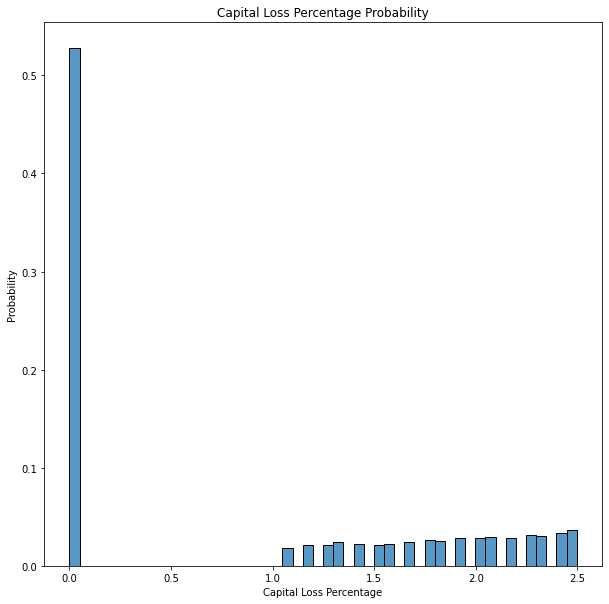

In [4]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.5, 
                        "amortization" : "Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

simulation_engine = SimulationEngine(pool_array, np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date, 20000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
analysis_engine.visualize_capital_losses([100])


We now see that the capital loss distribution shifts to the right, and most percentile values have increased. We want to reduce the 75 and 99 percentile values. Hence for designing pools, we should choose less risky pools.

Now lets try to add an uncorrelated pool with the same riskiness (10%). The 100 dollars will now be equally invested into these (assumign buyer demand is equal)

Default probability of pool A is  0.0957
Default probability of pool B is  0.0918
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 0.0
75 percentile capital loss is 0.0
99 percentile capital loss is 64.96322999279012
Mean capital loss is  10.881049098774318


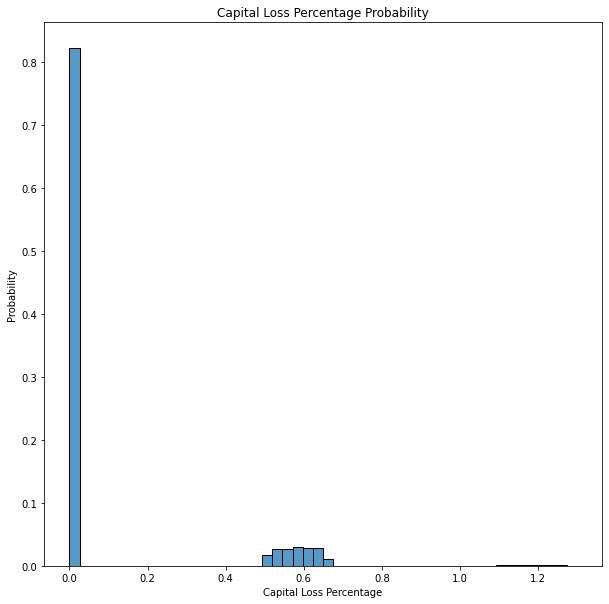

In [5]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.1,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool B", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.1,
                        "amortization":"Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

simulation_engine = SimulationEngine(pool_array, np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date, 20000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",
      analysis_engine.default_probabilities_pool()[1])

analysis_engine.visualize_capital_losses([50, 50])


We now see that the 99 percentile loss is less than the case where there was only one pool of 10% risk and all the 100 dollars were invested in it. Hence diversification helps (obvious, but wanted to verify)

Now lets compare two cases - a pool with one lending pool with 10% risk and one with 50% risk but with 0 correlation. And another with the same lending pools but with 1 correlation. 

Default probability of pool A is  0.28303333333333336
Default probability of pool B is  0.4778
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 70.78226387887528
75 percentile capital loss is 108.19033886085077
99 percentile capital loss is 204.7426099495313
Mean capital loss is  65.79017310742609


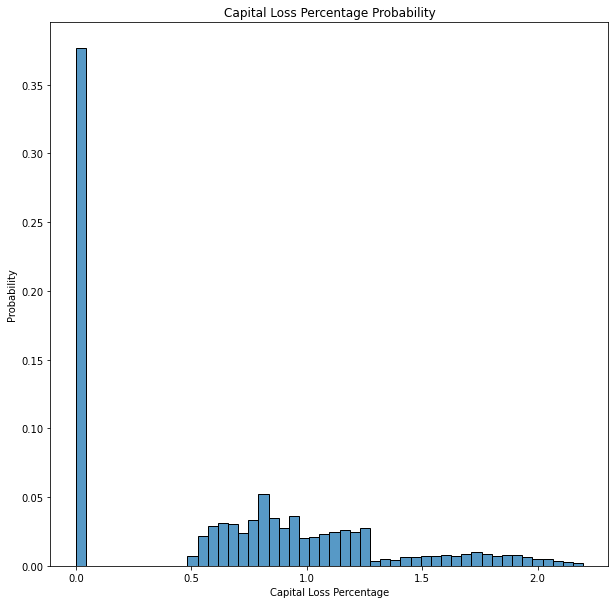

In [6]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.3,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool B", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.5,
                        "amortization":"Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

simulation_engine = SimulationEngine(pool_array, np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date, 30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",
      analysis_engine.default_probabilities_pool()[1])

analysis_engine.visualize_capital_losses([50, 50])


Default probability of pool A is  0.3401666666666667
Default probability of pool B is  0.5202
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 72.44484498918526
75 percentile capital loss is 120.65969718817593
99 percentile capital loss is 208.90737563085665
Mean capital loss is  73.44697594328287


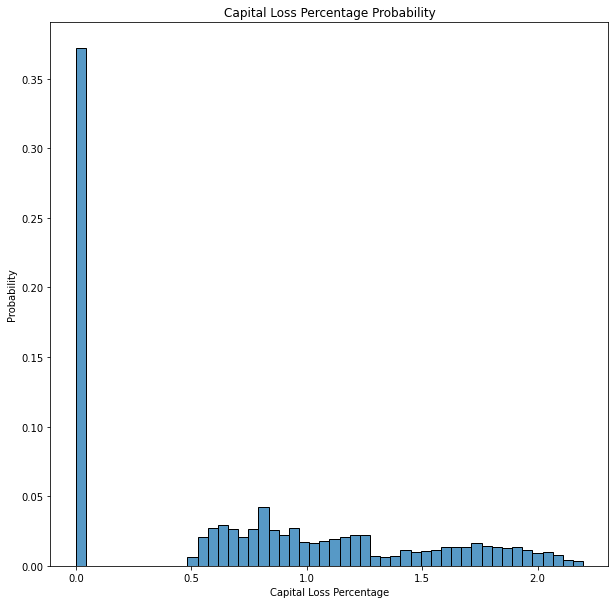

In [7]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.3,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool B", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.5,
                        "amortization":"Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

simulation_engine = SimulationEngine(pool_array, np.array([[1, 1], [1, 1]]))
simulation_engine.simulate_paths(pool_array[0].maturity_date, 30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",
      analysis_engine.default_probabilities_pool()[1])

analysis_engine.visualize_capital_losses([50, 50])


We see that the presence of a correlated other pool increases the probability of default for both pools, and increases the median loss (the 75th and 99th percentile loss were already maxed out). Also observe on the graph that rightmost bar on the x-axis has increased, indicating that the distribution has shifted to the right. Hence having uncorrelated pools is better.

So from a high view, addinng new pools to Carapace pool should decrease risk. Decreasing risk means one of various things - the distribution of capital loss shifts to the left, and the values on right tail decrease. The percentile values (median, 75th or 99th) decrease. So for testing which pool is more diversified, one can construct both of them and look at the capital loss distribution. Lets try this exercise

Consider Carapace pool 1 - it has 5 lending pools of risks [30,30,30,30,30] all of which are uncorrelated. 
Carapace pool 2 - it has 5 lending pools of risks [20,20,20,20,20] however all of them are fully correlated. Lets see which pool is less risky. We invest 100 dollars into both assuming equal protection buyer demand.

Default probability of pool A is  0.2810666666666667
Default probability of pool B is  0.28246666666666664
Default probability of pool C is  0.28426666666666667
Default probability of pool D is  0.28586666666666666
Default probability of pool E is  0.2851
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 23.99019466474404
50 percentile capital loss is 35.960778658976196
75 percentile capital loss is 62.943619322278266
99 percentile capital loss is 123.8921413121845
Mean capital loss is  42.47747931747174


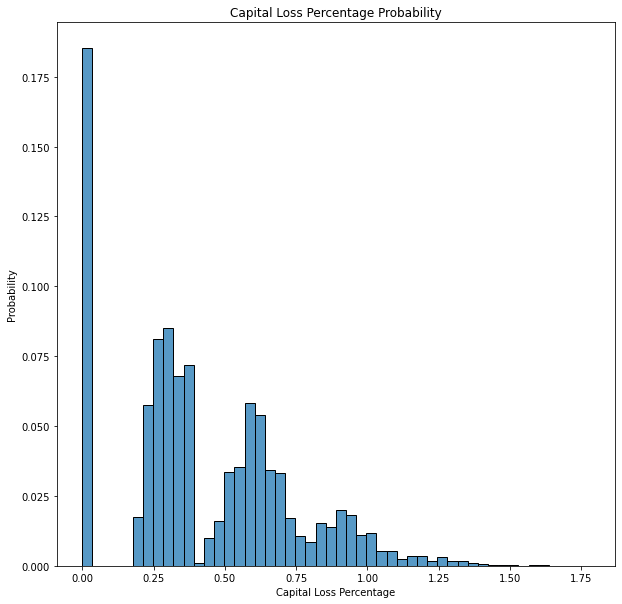

In [8]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.3,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool B", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.3,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool C", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.3,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool D", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.3,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool E", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.3,
                        "amortization":"Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

simulation_engine = SimulationEngine(pool_array, np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date, 30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",
      analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",
      analysis_engine.default_probabilities_pool()[2])
print("Default probability of pool D is ",
      analysis_engine.default_probabilities_pool()[3])
print("Default probability of pool E is ",
      analysis_engine.default_probabilities_pool()[4])


analysis_engine.visualize_capital_losses([20, 20, 20, 20, 20])


Default probability of pool A is  0.37316666666666665
Default probability of pool B is  0.37556666666666666
Default probability of pool C is  0.37793333333333334
Default probability of pool D is  0.37446666666666667
Default probability of pool E is  0.37776666666666664
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 34.9632299927902
75 percentile capital loss is 82.4448449891853
99 percentile capital loss is 154.86517664023071
Mean capital loss is  51.052499447248266


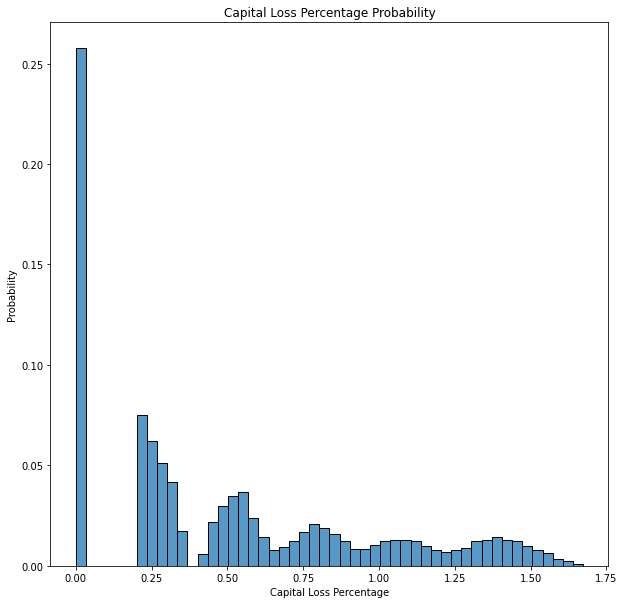

In [9]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool B", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool C", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool D", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool E", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

simulation_engine = SimulationEngine(
    pool_array, np.ones((len(pool_array), len(pool_array))))
simulation_engine.simulate_paths(pool_array[0].maturity_date, 30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",
      analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",
      analysis_engine.default_probabilities_pool()[2])
print("Default probability of pool D is ",
      analysis_engine.default_probabilities_pool()[3])
print("Default probability of pool E is ",
      analysis_engine.default_probabilities_pool()[4])


analysis_engine.visualize_capital_losses([20, 20, 20, 20, 20])


We find that both 99 percentile capital loss and mean capital loss are higher for the pools with seemingly less risk yet more correlation i.e pool 2. Pool 1 with all pools individually more risk (30%) is less risky than pool 2 with all pools individually less risky (25%) but more correlated.

Lets also compare with a pool 3 which has 5 lending pools with 25% risk but with 0.5 correlation between all of them

Default probability of pool A is  0.29583333333333334
Default probability of pool B is  0.29423333333333335
Default probability of pool C is  0.29433333333333334
Default probability of pool D is  0.29613333333333336
Default probability of pool E is  0.2942
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 31.638067772170153
75 percentile capital loss is 60.78226387887526
99 percentile capital loss is 140.73323720259552
Mean capital loss is  40.87278988223986


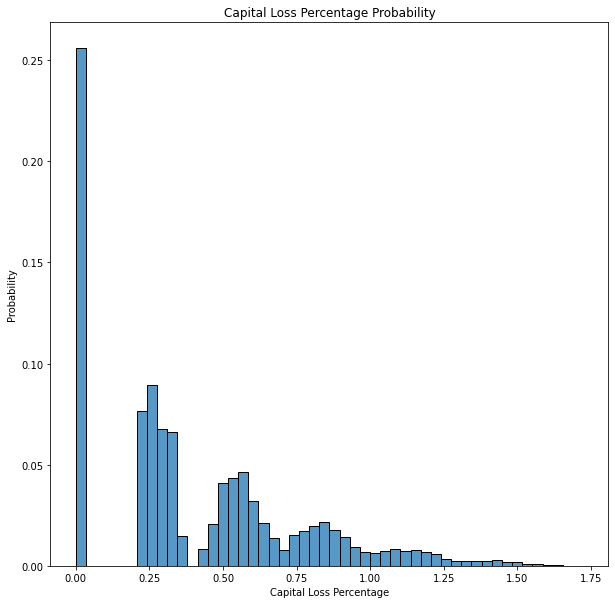

In [10]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool B", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool C", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool D", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool E", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

corr_matrix = 0.5*np.ones((len(pool_array), len(pool_array)))
np.fill_diagonal(corr_matrix, 1)
simulation_engine = SimulationEngine(pool_array, corr_matrix)
simulation_engine.simulate_paths(pool_array[0].maturity_date, 30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",
      analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",
      analysis_engine.default_probabilities_pool()[2])
print("Default probability of pool D is ",
      analysis_engine.default_probabilities_pool()[3])
print("Default probability of pool E is ",
      analysis_engine.default_probabilities_pool()[4])


analysis_engine.visualize_capital_losses([20, 20, 20, 20, 20])


We find that this is also more riskier than the 30% pool with no correlation. However both the 99 percentile capital and 75 percentile capital loss is less than 25% pool with 1 correlation, indicating that our model is monotonic with correlation.

Lets illustrate a tricky thing now - clusters. Imagine a carapace pool 1 with 3 lending pools, where all 3 pools are correlated 0.5. And lets compare this with carapace pool 2 where the first lending pool is uncorrelated, and the second and the third lending pool are correlated fully - 1. 

Default probability of pool A is  0.2608666666666667
Default probability of pool B is  0.26063333333333333
Default probability of pool C is  0.26163333333333333
Initial investment total is  99.89999999999999
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 37.452296322999274
75 percentile capital loss is 55.44558038932949
99 percentile capital loss is 148.34345710165826
Mean capital loss is  36.528285746214856


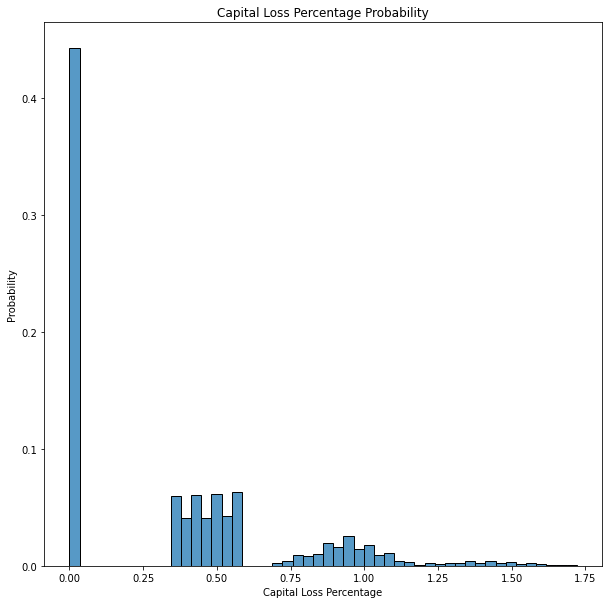

In [11]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool B", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool C", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

corr_matrix = 0.5*np.ones((len(pool_array), len(pool_array)))
np.fill_diagonal(corr_matrix, 1)

simulation_engine = SimulationEngine(pool_array, corr_matrix)
simulation_engine.simulate_paths(pool_array[0].maturity_date, 30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",
      analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",
      analysis_engine.default_probabilities_pool()[2])


analysis_engine.visualize_capital_losses([33.3, 33.3, 33.3])


Default probability of pool A is  0.2363
Default probability of pool B is  0.2633
Default probability of pool C is  0.26016666666666666
Initial investment total is  99.89999999999999
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 38.83639509733237
75 percentile capital loss is 54.061481614996396
99 percentile capital loss is 142.80706200432587
Mean capital loss is  35.59547963987023


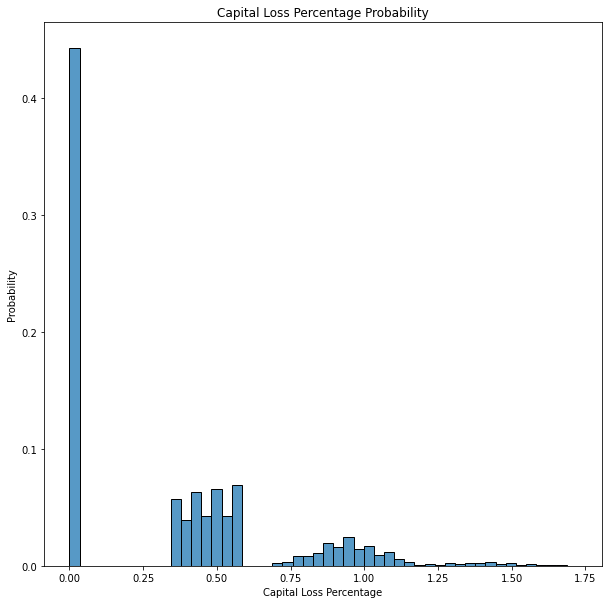

In [12]:
pool_info_array = []  # Initialize the pool info array
pool_info_array.append({"name": "Pool A", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool B", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
pool_info_array.append({"name": "Pool C", "principal": 1,
                        "maturity_date": datetime.date(2026, 5, 1), "payment_period": 60,
                        "rate": 0.25,
                        "amortization":"Bullet"})
# Append info for each pool
pool_array = []  # Initialize the pool array
for pool_info in pool_info_array:  # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

corr_matrix = np.ones((len(pool_array), len(pool_array)))
corr_matrix[0][1] = 0
corr_matrix[0][2] = 0
corr_matrix[2][0] = 0
corr_matrix[1][0] = 0

simulation_engine = SimulationEngine(pool_array, corr_matrix)
simulation_engine.simulate_paths(pool_array[0].maturity_date, 30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",
      analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",
      analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",
      analysis_engine.default_probabilities_pool()[2])


analysis_engine.visualize_capital_losses([33.3, 33.3, 33.3])


It seems both of the pools have similar numbers even though the 99 percentile loss is higher for the pool where all are correlated 0.5. However till now we have assumed that the protection buyer demand is equal. In the case when the protection buyer demand is equally distributed in the two correlated lending pools, the capital distribution will change, because now protection sellers money is effectively going into those two pools. Lets get the new numbers now

Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 0.0
75 percentile capital loss is 70.78226387887527
99 percentile capital loss is 162.34679163662582
Mean capital loss is  36.709525474645524


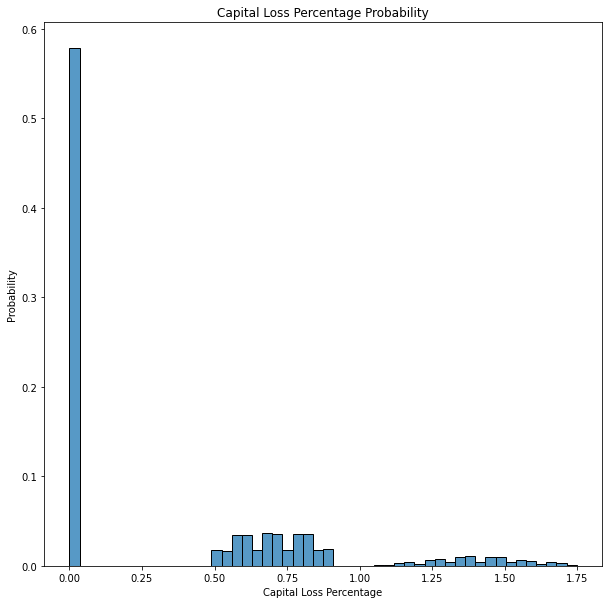

In [13]:
analysis_engine = AnalysisEngine(simulation_engine)
# 50 percent allocated to last two pools
analysis_engine.visualize_capital_losses([0, 50, 50])


We see now that 99 percentile capital loss and other metrics rise a lot. This shows how in pool design you should identify clusters of correlated pools and change the pool design based on buyer demand. Hence from a protection sellers pov, our model also take the protection buyer into account.

### Final comments

I have showed a lot of example proving how the simulations take various factors into account. Of course there are various other factors - financing rate, loan maturity, loan amortization which can be studied in the context of our simulations. However the underlying simulations does model everything in a sensible manner, and it is a good tool to get which Carapace pool is risky, particularly in tricky situations which I illustrated above. I will make some final points to keep into account

1. Our code doesnt model the exact default probabilities i.e it implies a risk factor based on the financing rate based on the Carapace formula, and because we use Poisson distribution, the probability of survival is exactly the financign rate. Of course in the real world this might not be a correct estimate. However I am confident that as long as we preserve the order of riskiness, we will still get correct comparisons. This means that if we know in the real world a lending pool A is more riskier than lending pool B, as long as our implied risk factors also follow that relation (which they do), the results we get by comparing a Carapace pool with lending pool A, and then replacing that with lending pool B should show us that the first Carapace pool is riskier.

2. Again the absolute 99 percentile capital loss are not what they will be in real world. Real world loans are bullet i.e they pay interest and then pay most of the principal on one payment date which is not known in advance. WE currently model bullet amortization, but again the ordering of capital loss percentages should follow real world ordering. The idea behind these simulations is to see addition of which pools make it more risky, and can we compare a cluster of pools A and cluster of pools B. THe bullet amortization idea does preserve the ordering, and is suitable for us. In the future we can model more complicated payment logic, as long as is it is known in advance. 

3. Modelling the initial investment based on protection buyer demand is important as I showed in the last example.

4. I am not able to come up with a criteria yet for what 99 percentile capital loss should you allow a Carapace pool to exist. For that I would need lots of constituent loans I can play around with and construct different combinations, where currently I only have 8. However of course you can order combinations based on riskiness using these simulations

5. The more better our correlation models are, the more our simulations will represent real life. And the more accurately you model interest payments, the more they will come to real world. However as I have a two week deadline, this is the maximum I can do. Building credit models is an ongoing task.

6. In the absence of good correlation numbers, it is always better to overestimate rather underestimate.

7. In real world when a loan defaults, not the entire principal is lost, you are able to recover some amount of it, which is modelled by the recovery amount in various financial institutions (Goldman included). Our equal amortization assumption for a bullet loan is a good approximation for that.